#Importing Dataset

In [1]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/anjua/Prodrigy_Task_1/world_population_data.csv")

In [3]:
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


Basic Exploration

In [4]:
df.shape

(234, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

In [6]:
df.describe()

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000
mean,117.500000,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051
std,67.694165,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922
min,1.000000,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000
25%,59.250000,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000
50%,117.500000,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000
75%,175.750000,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000
max,234.000000,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000


In [7]:
df.isnull().sum()

rank                0
cca3                0
country             0
continent           0
2023 population     0
2022 population     0
2020 population     0
2015 population     0
2010 population     0
2000 population     0
1990 population     0
1980 population     0
1970 population     0
area (km²)          0
density (km²)       0
growth rate         0
world percentage    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

rank                234
cca3                234
country             234
continent             6
2023 population     234
2022 population     234
2020 population     234
2015 population     234
2010 population     234
2000 population     234
1990 population     234
1980 population     234
1970 population     234
area (km²)          232
density (km²)       167
growth rate         176
world percentage     73
dtype: int64

Continent-wise Population

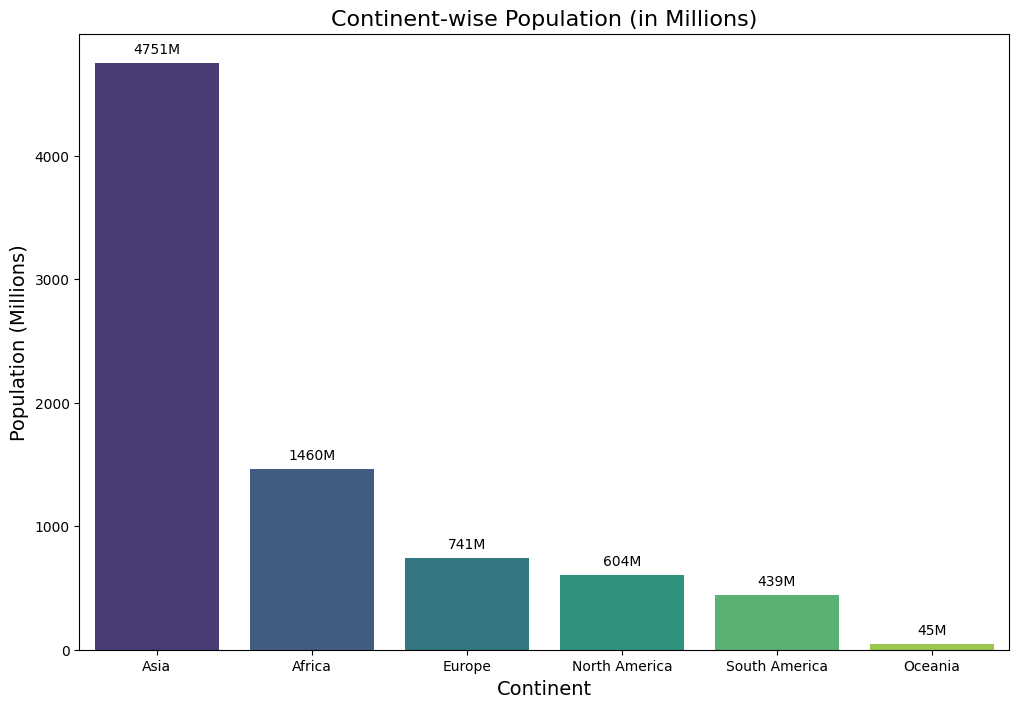

In [10]:
# Calculate total population for each continent
continent_population = df.groupby('continent')['2023 population'].sum() / 1e6

# Sort the continents by population
sorted_continents = continent_population.sort_values(ascending=False).index

# Set color palette for the bar plot
palette = "viridis"

# Create a vertical bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_continents, y=continent_population[sorted_continents], palette=palette)

# Add values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Continent-wise Population (in Millions)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population (Millions)', fontsize=14)

# Show the plot
plt.show()

Top 10 Most Populated Countries

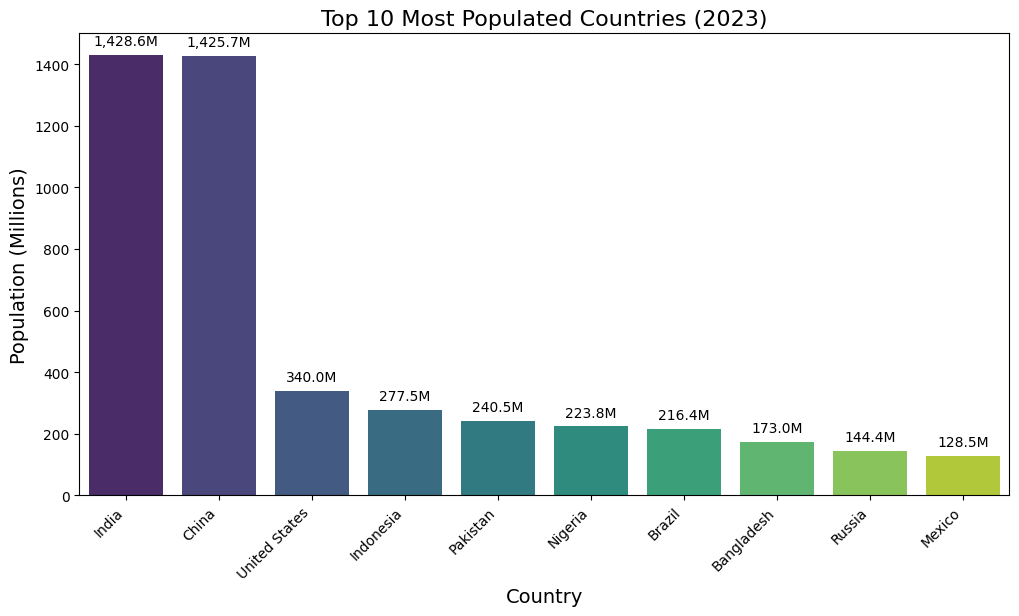

In [11]:
# Convert population to millions
df['2023 population (millions)'] = df['2023 population'] / 1e6

# Sort the DataFrame by population in descending order
df_sorted = df.sort_values(by='2023 population (millions)', ascending=False)

# Take the top 10 populated countries
top_10_countries = df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country', y='2023 population (millions)', data=top_10_countries, palette='viridis')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Top 10 Most Populated Countries (2023)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population (Millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

Top 10 Least Populated Countries

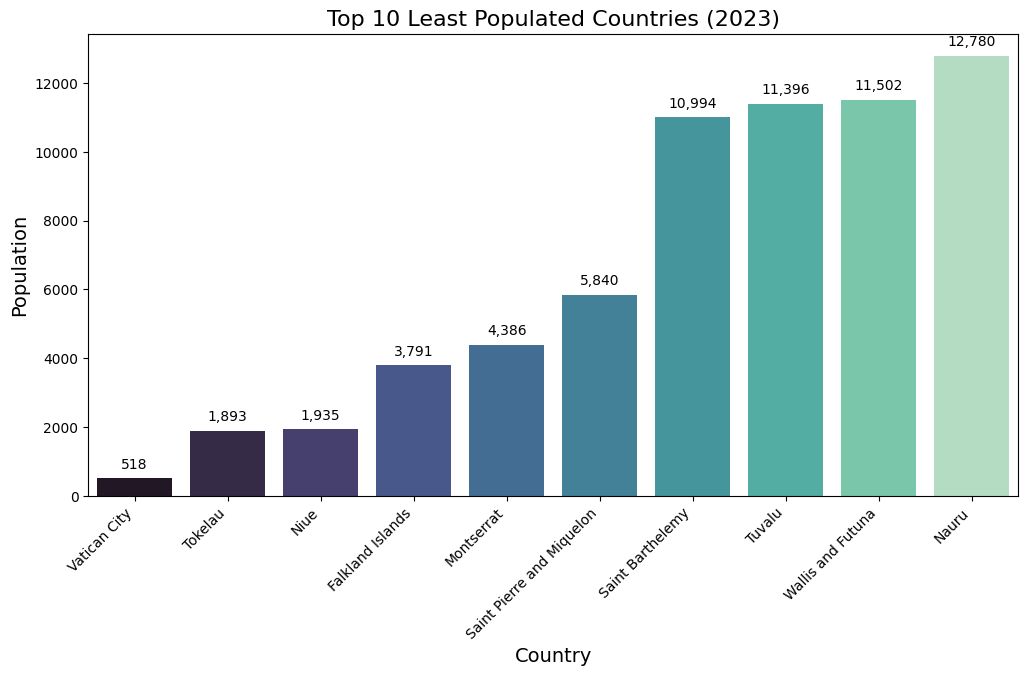

In [12]:
# Sort the DataFrame by population in ascending order
df_sorted = df.sort_values(by='2023 population')

# Take the bottom 10 populated countries (least populated)
bottom_10_countries = df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country', y='2023 population', data=bottom_10_countries, palette='mako')

# Display values at the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Top 10 Least Populated Countries (2023)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

Top 10 Countries in Asia

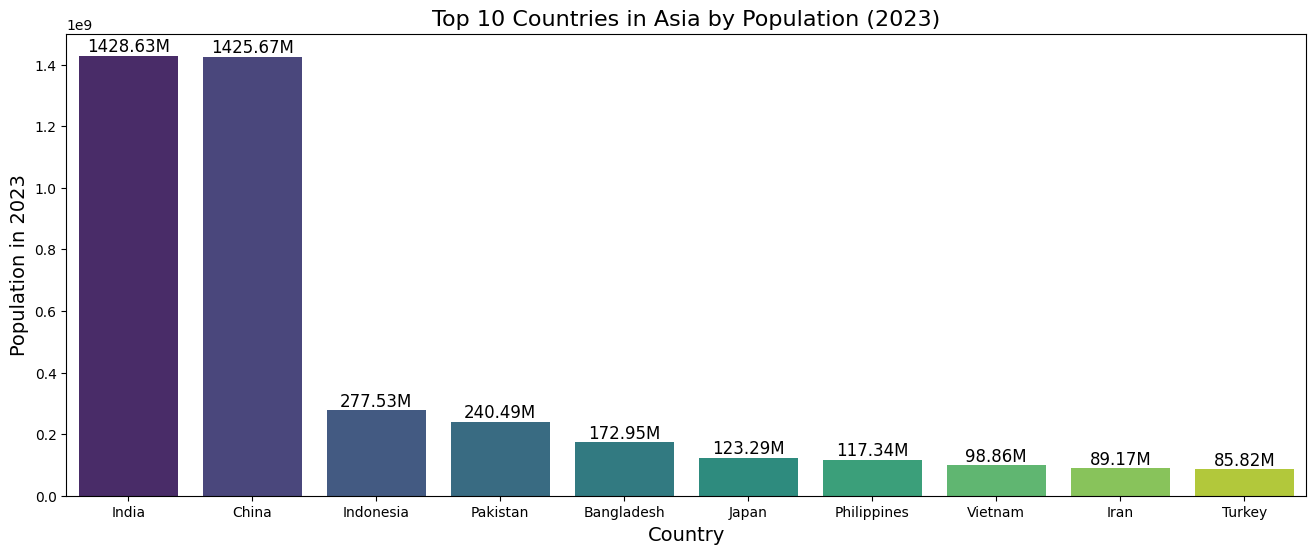

In [13]:
# Filter data for Asia and sort by population in 2023
asia_population_2023 = df[df['continent'] == 'Asia'].sort_values(by='2023 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in Asia by population in 2023
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country', y='2023 population', data=asia_population_2023, palette='viridis')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in Asia by Population (2023)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population in 2023', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

Indian Population Distribution

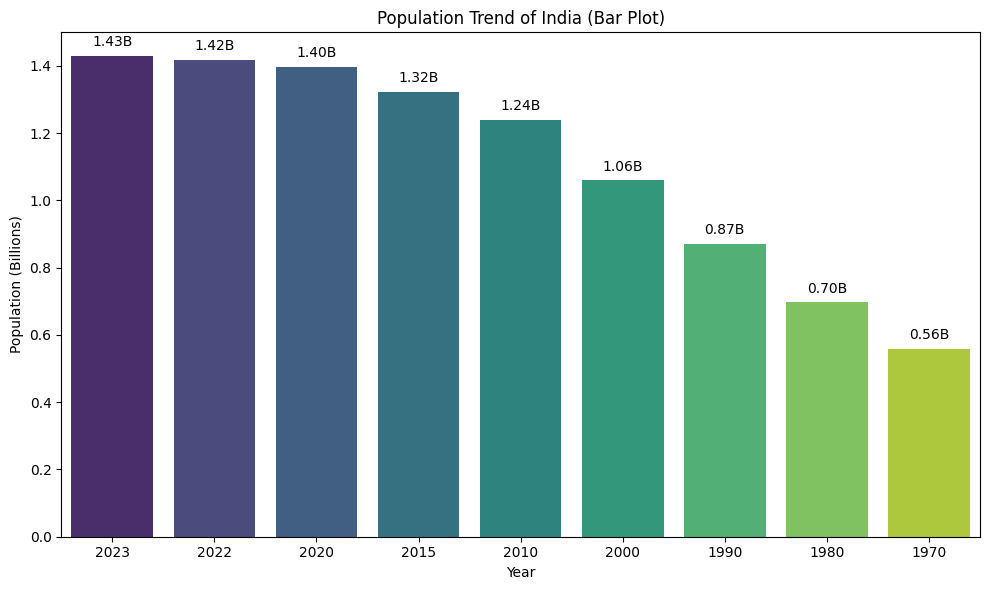

In [14]:
import seaborn as sns

# Assuming df is your DataFrame
# df = ...

# Filter data for India
india_data = df[df['country'] == 'India']

# Set color palette for the bar plot
palette = "viridis"

# Extracting India's population data
india_population = india_data[['2023 population', '2022 population', '2020 population', '2015 population', '2010 population', '2000 population', '1990 population', '1980 population', '1970 population']].iloc[0] / 1e9

years = ['2023', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=years, y=india_population, palette=palette)

plt.title('Population Trend of India (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')

# Annotate each bar with the population values in billions
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove y-axis gridlines
bar_plot.yaxis.grid(False)    

plt.tight_layout()
plt.show()


World Population Distribution

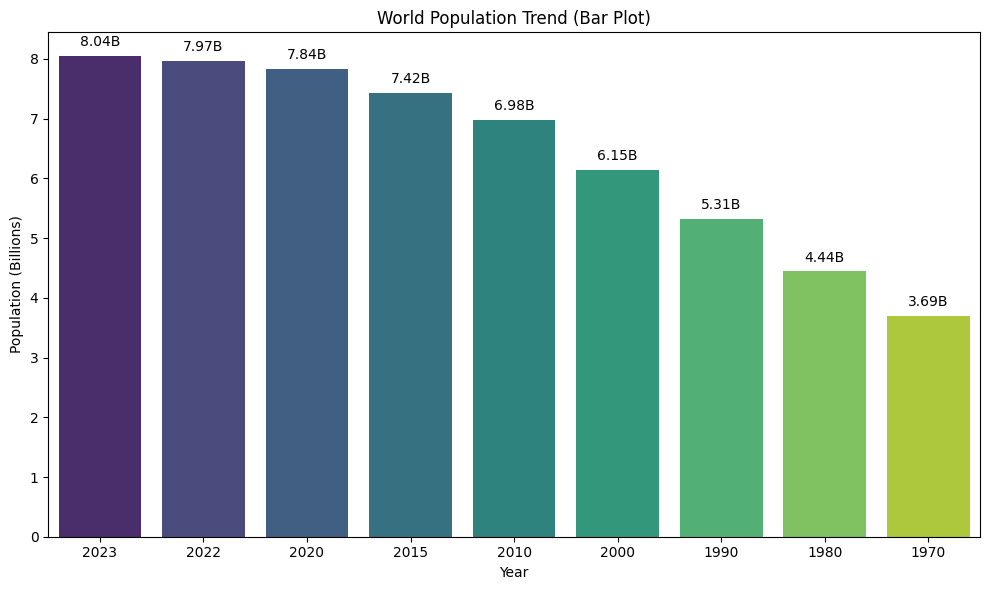

In [15]:
import seaborn as sns

# Assuming df is your DataFrame
# df = ...

# Set color palette for the bar plot
palette = "viridis"

# Extracting world population data
world_population = df[['2023 population', '2022 population', '2020 population', '2015 population', '2010 population', '2000 population', '1990 population', '1980 population', '1970 population']].sum() / 1e9
years = ['2023', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=years, y=world_population, palette=palette)

plt.title('World Population Trend (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')

# Annotate each bar with the population values in billions
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove y-axis gridlines
bar_plot.yaxis.grid(False)    

plt.tight_layout()
plt.show()
